In [17]:
#split the date part to year and month
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
LLM_predicts = pd.read_json('llm_sentiment.json', lines=True)

In [6]:
LLM_predicts.iloc[77]

business_id                                 agzEfydzvZWlbzpcMxLPBg
text             This is the worst Starbucks location I have ev...
city                                                          Reno
date                                           2017-07-31 03:53:37
stars_3_scale                                                    1
address                          6890 South McCarran Blvd, Ste 100
llm_sentiment                                          I have been
Name: 77, dtype: object

In [10]:
#pd.to_numeric(LLM_predicts["llm_sentiment"], errors='coerce')
LLM_predicts['llm_sentiment'] = pd.to_numeric(LLM_predicts['llm_sentiment'], errors='coerce')



In [12]:
v = LLM_predicts['llm_sentiment'].value_counts()
v

llm_sentiment
 1.0    10325
 3.0    10011
 2.0     1217
-1.0        1
Name: count, dtype: int64

In [13]:
LLM_predicts = LLM_predicts.dropna(subset=["llm_sentiment"])
LLM_predicts

,business_id,text,city,date,stars_3_scale,address,llm_sentiment
0,aJvxWyQIG5OLfBw3qAe8xA,"Ordered Caramel frappe at Drive thru, BIG MIST...",Nashville,2017-12-29 19:38:31,1,2308 Murfreesboro Pike,1.0
1,MjZQqZAmJeMco_Vq-Y9h-g,Drum-roll please! Review #100 coming right up!...,Carmel,2014-02-05 19:38:24,3,13170 North Hazel Dell Pkwy,3.0
2,u7MJKcNdZXYyTeb67vD5jw,We stopped here for my Chai and Hubby's coffee...,Mount Laurel,2017-02-09 04:35:39,3,5 Hartford Rd,3.0
3,saJFbz12EnzanelpD8_xXQ,There's been three times that I've ordered a g...,Riverview,2016-08-25 14:08:18,1,10716 Big Bend Rd,1.0
4,KiE0h68HGOO7ZXAqkMBdiw,"I went in when they had 4 people working, wait...",Santa Barbara,2016-01-30 01:10:42,1,1015 De La Vina St,1.0
...,...,...,...,...,...,...,...
21570,-85kJMtb9wqNWDT8yLbitw,Fair service- messed up my drink cuppa times....,Franklin,2021-12-13 22:08:14,2,"438 Main St, Space 168, Space 168",1.0
21571,Ddg-J_j0YFErk7wpMtH_0A,On my way out of Reno last week I noted a new ...,Reno,2021-12-28 19:26:37,3,986 Ambassador Dr,3.0
21572,2rmpfdyV2POqpXtmPHO_IQ,always closing drive thru. i've driven here so...,Tucson,2021-12-28 18:12:04,1,6363 N La Cholla,1.0
21573,GxuxCctcz3Hyk0wnuly7vQ,This is now one of two Starbucks in the shoppi...,Tucson,2017-01-21 00:19:27,3,4811 E Grant,3.0


In [14]:
print(classification_report(LLM_predicts["stars_3_scale"], LLM_predicts['llm_sentiment']))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       0.82      0.98      0.90      8652
         2.0       0.53      0.23      0.32      2816
         3.0       0.93      0.92      0.92     10086

    accuracy                           0.85     21554
   macro avg       0.57      0.53      0.53     21554
weighted avg       0.83      0.85      0.83     21554



c:\Users\gunja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gunja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gunja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
print(confusion_matrix(LLM_predicts["stars_3_scale"], LLM_predicts['llm_sentiment']))

[[   0    0    0    0]
 [   1 8518   97   36]
 [   0 1463  642  711]
 [   0  344  478 9264]]


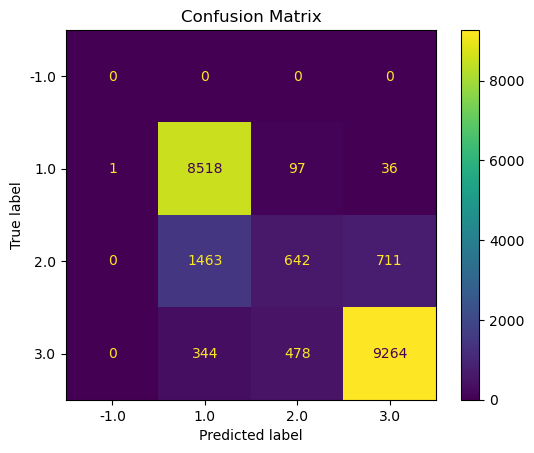

In [18]:
ConfusionMatrixDisplay.from_predictions(LLM_predicts["stars_3_scale"], LLM_predicts['llm_sentiment'])#, display_labels=labels)
plt.title('Confusion Matrix')
plt.show()